### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
healty_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/healty-dataset"
diseased_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [4]:
healty_ = np.load(healty_path + "/trimmed_5_healty.npy", allow_pickle = True)

In [5]:
mr_ = np.load(diseased_path + "/trimmed_5_mr.npy", allow_pickle= True)
as_ = np.load(diseased_path + "/trimmed_5_as.npy", allow_pickle= True)
ar_ = np.load(diseased_path + "/trimmed_5_ar.npy", allow_pickle= True)

In [6]:
healty_.shape

(3, 282, 2560)

In [7]:
mr_.shape

(3, 219, 2560)

In [8]:
as_.shape

(3, 139, 2560)

In [9]:
ar_.shape

(3, 242, 2560)

#### preview of some signal pieces

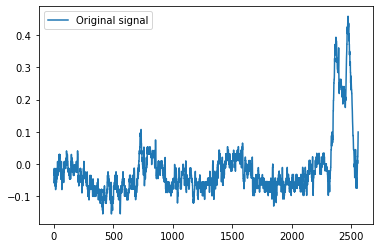

In [10]:
plt.plot(mr_[0][0])
plt.legend(['Original signal'])

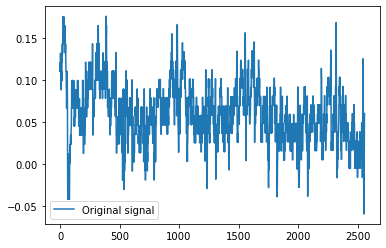

In [11]:
plt.plot(mr_[0][1])
plt.legend(['Original signal'])

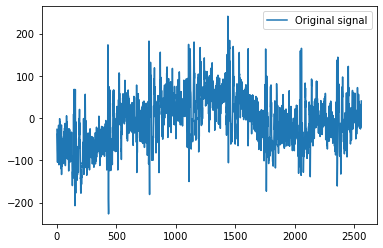

In [12]:
plt.plot(healty_[0][1])
plt.legend(['Original signal'])

## Let's look at wavelet decomposition for a signal piece

In [13]:
w = pywt.Wavelet('sym5')

In [14]:
coef_mr_x, coef_mr_y, coef_mr_z = [], [], []
for i in range(len(mr_[0])):
    coef_mr_x.append(pywt.wavedec(mr_[0][i], w, level=6))
    coef_mr_y.append(pywt.wavedec(mr_[1][i], w, level=6))
    coef_mr_z.append(pywt.wavedec(mr_[2][i], w, level=6))

In [15]:
coef_as_x, coef_as_y, coef_as_z = [], [], []
for i in range(len(as_[0])):
    coef_as_x.append(pywt.wavedec(as_[0][i], w, level=6))
    coef_as_y.append(pywt.wavedec(as_[1][i], w, level=6))
    coef_as_z.append(pywt.wavedec(as_[2][i], w, level=6))

In [16]:
coef_ar_x, coef_ar_y, coef_ar_z = [], [], []
for i in range(len(ar_[0])):
    coef_ar_x.append(pywt.wavedec(ar_[0][i], w, level=6))
    coef_ar_y.append(pywt.wavedec(ar_[1][i], w, level=6))
    coef_ar_z.append(pywt.wavedec(ar_[2][i], w, level=6))

In [17]:
coef_h_x, coef_h_y, coef_h_z = [], [], []
for i in range(len(healty_[0])):
    coef_h_x.append(pywt.wavedec(healty_[0][i], w, level=6))
    coef_h_y.append(pywt.wavedec(healty_[1][i], w, level=6))
    coef_h_z.append(pywt.wavedec(healty_[2][i], w, level=6))

In [18]:
coef_mr_x = np.array(coef_mr_x)
coef_as_x = np.array(coef_as_x)
coef_ar_x = np.array(coef_ar_x)
coef_h_x = np.array(coef_h_x)

Generally each level contains different number of points. Since our aim is to convert these into csv file, I am going to take mean of every level.

In [19]:
import pandas as pd

In [20]:
mr = np.stack((coef_mr_x, coef_mr_y, coef_mr_z), axis = 0)
ar = np.stack((coef_ar_x, coef_ar_y, coef_ar_z), axis = 0)
ass = np.stack((coef_as_x, coef_as_y, coef_as_z), axis = 0)
healty = np.stack((coef_h_x, coef_h_y, coef_h_z), axis = 0)

her level için coef sayısı
* lvl 1 = 48
* lvl 2 = 48
* lvl 3 = 88
* lvl 4 = 168
* lvl 5 = 327
* lvl 6 = 646
* lvl 7 = 1284

In [21]:
def level_coef_extractor(array, lvl = 1):
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], lenn)) #219,48
    
    for i in range(array.shape[0]):
        coef[i] = array[i][lvl]
    return coef

In [22]:
def level_coef_extractor_3d(array, lvl = 1):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[0]):
        coef[0][i] = array[0][i][lvl]
        coef[1][i] = array[1][i][lvl]
        coef[2][i] = array[2][i][lvl]
        
    return coef

In [23]:
lvl_1 = level_coef_extractor(mr[0], 1)
lvl_1.shape

(219, 48)

In [24]:
lvl_1_3d = level_coef_extractor_3d(mr, 1)
lvl_1_3d.shape

(3, 219, 48)

In [25]:
from scipy.stats import mannwhitneyu
import pandas as pd
from scipy import stats

### With mannwhitney u test

### Level 1 

In [26]:
lvl1_healty = level_coef_extractor_3d(healty, 0)
lvl1_mr = level_coef_extractor_3d(mr, 0)
lvl1_ar = level_coef_extractor_3d(ar, 0)
lvl1_as = level_coef_extractor_3d(ass, 0)


In [27]:
print(lvl1_healty.shape)
print(lvl1_mr.shape)
print(lvl1_ar.shape)
print(lvl1_as.shape)

(3, 282, 48)
(3, 219, 48)
(3, 242, 48)
(3, 139, 48)


#### mr

In [28]:
test = mannwhitneyu(lvl1_healty, lvl1_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.410961,0.081252,0.081252,0.081252,0.766328,0.766328,0.307574,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.410961,0.410961,0.122263,0.921090,0.921090,0.410961,0.410961,0.410961,0.410961,0.410961,0.410961,0.410961,0.410961
1,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.013640,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252
2,0.081252,0.081252,0.081252,0.081252,0.081252,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.766328,0.766328,0.766328,0.766328,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.081252,0.081252,0.013640,0.081252,0.081252,0.081252,0.081252


#### ar

In [29]:
test = mannwhitneyu(lvl1_healty, lvl1_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.350150,0.350150,0.350150,0.350150,0.014116,0.014116,0.090208,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.350150,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.350150,0.350150,0.861631,0.090208,0.090208,0.090208,0.090208,0.350150,0.350150,0.953670,0.350150,0.350150,0.350150
1,0.861631,0.861631,0.861631,0.861631,0.482740,0.482740,0.482740,0.482740,0.482740,0.482740,0.482740,0.482740,0.861631,0.861631,0.861631,0.861631,0.482740,0.482740,0.482740,0.482740,0.482740,0.114542,0.114542,0.114542,0.861631,0.861631,0.861631,0.861631,0.861631,0.482740,0.482740,0.114542,0.114542,0.114542,0.114542,0.114542,0.114542,0.482740,0.482740,0.861631,0.861631,0.861631,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150
2,0.090208,0.090208,0.090208,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.861631,0.861631,0.861631,0.861631,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.090208,0.090208,0.014116,0.090208,0.090208,0.090208,0.090208


#### as

In [30]:
test = mannwhitneyu(lvl1_healty, lvl1_as, use_continuity=False, alternative = 'two-sided', axis = 1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.042914,0.042914,0.042914,0.042914,0.383634,0.383634,0.147649,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.042914,0.042914,0.009289,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914
1,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.009289,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914
2,0.042914,0.042914,0.042914,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.383634,0.383634,0.383634,0.383634,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.009289,0.042914,0.042914,0.042914,0.042914


## with two sample t distribution

#### mr

In [31]:
p_val_mr = pd.DataFrame(stats.ttest_ind(lvl1_healty, lvl1_mr, axis =1)[1])
p_val_mr.style.apply(lambda x: ["background: pink" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.747813,0.913757,0.829330,0.476374,0.235747,0.250353,0.350784,0.824998,0.805557,0.853850,0.889050,0.394227,0.701320,0.941432,0.655139,0.508604,0.494919,0.907739,0.926117,0.500073,0.723691,0.482689,0.601058,0.780000,0.799124,0.823125,0.748557,0.584263,0.730361,0.932882,0.721159,0.933061,0.667441,0.466981,0.741327,0.860950,0.658518,0.207573,0.513405,0.753574,0.627522,0.928924,0.681029,0.463087,0.456824,0.461260,0.462212,0.465091
1,0.251757,0.261869,0.253254,0.211357,0.149789,0.129012,0.146726,0.141756,0.129589,0.142545,0.125406,0.177572,0.151645,0.200265,0.186374,0.138155,0.208670,0.125075,0.134253,0.123451,0.122300,0.151515,0.139576,0.152245,0.127561,0.130263,0.184968,0.164136,0.124036,0.120564,0.126818,0.185946,0.127163,0.125783,0.127164,0.123034,0.170854,0.123577,0.154662,0.170891,0.153968,0.238738,0.406509,0.545442,0.832285,0.756372,0.765461,0.798431
2,0.599174,0.597324,0.605236,0.635071,0.809997,0.893492,0.986526,0.996300,0.849188,0.928063,0.810383,0.601212,0.465519,0.302468,0.193158,0.151882,0.130091,0.178275,0.553748,0.761250,0.876961,0.753664,0.659406,0.601860,0.581231,0.518480,0.489309,0.446390,0.389065,0.379186,0.365813,0.470289,0.695559,0.851922,0.827130,0.852491,0.764131,0.927511,0.967837,0.935373,0.944533,0.866048,0.639943,0.226813,0.340783,0.308236,0.309089,0.342259


#### ar

In [32]:
p_val_ar = pd.DataFrame(stats.ttest_ind(lvl1_healty, lvl1_ar, axis =1)[1])
p_val_ar.style.apply(lambda x: ["background: pink" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.730444,0.904131,0.815560,0.450219,0.210678,0.225149,0.324429,0.812344,0.791930,0.841152,0.875900,0.376652,0.690465,0.935241,0.635834,0.484891,0.470384,0.895661,0.916159,0.474167,0.705285,0.456398,0.579272,0.765381,0.783313,0.819423,0.730914,0.569297,0.721663,0.934231,0.701111,0.923509,0.657236,0.447582,0.733439,0.858703,0.645774,0.186698,0.493710,0.739075,0.610085,0.925288,0.665806,0.441305,0.434521,0.439106,0.440095,0.443011
1,0.231584,0.241406,0.233040,0.192483,0.135361,0.114647,0.133050,0.128994,0.115534,0.129448,0.112390,0.162413,0.137835,0.185330,0.170447,0.123498,0.194935,0.112407,0.120442,0.112176,0.110439,0.139763,0.124463,0.137076,0.116119,0.116984,0.172796,0.150446,0.113910,0.109394,0.115405,0.173629,0.114246,0.112770,0.114095,0.109318,0.157815,0.111076,0.142416,0.158321,0.140380,0.223475,0.396864,0.535177,0.829530,0.750541,0.760298,0.794836
2,0.556785,0.555305,0.562819,0.591679,0.765843,0.861544,0.959586,0.979815,0.818154,0.900903,0.825061,0.606537,0.463015,0.294617,0.183836,0.144536,0.122562,0.173777,0.567073,0.783440,0.843782,0.720409,0.625857,0.568265,0.547091,0.483662,0.452530,0.408208,0.347532,0.328401,0.276863,0.516524,0.715243,0.871842,0.845196,0.869899,0.777551,0.950634,0.994286,0.900129,0.908485,0.815327,0.585478,0.182424,0.291153,0.259076,0.259895,0.291919


#### as

In [33]:
p_val_as = pd.DataFrame(stats.ttest_ind(lvl1_healty, lvl1_as, axis = 1)[1])
p_val_as.style.apply(lambda x: ["background: pink" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.802971,0.936090,0.868559,0.574727,0.346817,0.361428,0.459139,0.862855,0.846921,0.886365,0.914839,0.494921,0.758409,0.954733,0.723526,0.600740,0.589986,0.932434,0.945995,0.594405,0.781919,0.578139,0.678336,0.825517,0.842066,0.855372,0.802456,0.657125,0.776678,0.941754,0.780534,0.950688,0.729609,0.560211,0.790067,0.884629,0.720261,0.310842,0.597543,0.806473,0.703345,0.947173,0.740514,0.557887,0.552239,0.556106,0.556956,0.559470
1,0.361136,0.371235,0.362588,0.319379,0.251357,0.227134,0.248247,0.241800,0.227485,0.242377,0.221924,0.283754,0.253096,0.308210,0.293150,0.237628,0.317652,0.221994,0.233427,0.221118,0.218765,0.253691,0.239278,0.253242,0.225557,0.228079,0.291194,0.268440,0.220113,0.217221,0.225181,0.292604,0.224627,0.222884,0.223269,0.219026,0.273099,0.218606,0.256169,0.275486,0.257060,0.347525,0.506614,0.629334,0.865114,0.803959,0.811293,0.837841
2,0.673089,0.671540,0.678164,0.703075,0.846132,0.913212,0.987429,0.998453,0.878247,0.941575,0.849513,0.678728,0.562354,0.412736,0.301313,0.254930,0.229259,0.285426,0.639745,0.811424,0.900058,0.801327,0.724515,0.676930,0.659539,0.606112,0.580838,0.542854,0.491064,0.481094,0.464654,0.570293,0.757781,0.883559,0.863569,0.883859,0.812638,0.943879,0.976273,0.946212,0.953068,0.889660,0.706601,0.333384,0.445491,0.414404,0.415270,0.446859


### Level 2

In [34]:
lvl2_healty = level_coef_extractor_3d(healty, 1)
lvl2_mr = level_coef_extractor_3d(mr, 1)
lvl2_ar = level_coef_extractor_3d(ar, 1)
lvl2_as = level_coef_extractor_3d(ass, 1)


print(lvl2_healty.shape)
print(lvl2_mr.shape)
print(lvl2_ar.shape)
print(lvl2_as.shape)

(3, 282, 48)
(3, 219, 48)
(3, 242, 48)
(3, 139, 48)


#### mr

In [35]:
test = mannwhitneyu(lvl2_healty, lvl2_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.081252,0.013640,0.766328,0.013640,0.766328,0.081252,0.081252,0.081252,0.013640,0.307574,0.081252,0.307574,0.766328,0.081252,0.307574,0.766328,0.766328,0.302902,0.013640,0.081252,0.307574,0.766328,0.766328,0.081252,0.081252,0.766328,0.081252,0.307574,0.766328,0.013640,0.307574,0.081252,0.307574,0.307574,0.013640,0.307574,0.081252,0.766328,0.766328,0.766328,0.307574,0.766328,0.081252,0.307574,0.013640,0.766328,0.013640,0.766328
1,0.013640,0.307574,0.013640,0.766328,0.307574,0.766328,0.307574,0.013640,0.013640,0.081252,0.299813,0.013640,0.081252,0.766328,0.766328,0.081252,0.081252,0.013640,0.307574,0.307574,0.766328,0.081252,0.307574,0.307574,0.307574,0.081252,0.081252,0.080106,0.307574,0.081252,0.766328,0.081252,0.081252,0.307574,0.307574,0.307574,0.302902,0.013640,0.081252,0.081252,0.081252,0.307574,0.307574,0.307574,0.307574,0.081252,0.307574,0.081252
2,0.081252,0.307574,0.081252,0.307574,0.766328,0.307574,0.766328,0.307574,0.013640,0.081252,0.081252,0.081252,0.013640,0.307574,0.307574,0.766328,0.307574,0.081252,0.307574,0.766328,0.766328,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.307574,0.081252,0.766328,0.081252,0.307574,0.766328,0.081252,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.081252,0.307574


#### ar

In [36]:
test = mannwhitneyu(lvl2_healty, lvl2_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.090208,0.014116,0.861631,0.014116,0.861631,0.090208,0.090208,0.090208,0.014116,0.350150,0.090208,0.350150,0.861631,0.090208,0.350150,0.861631,0.861631,0.345313,0.014116,0.090208,0.350150,0.861631,0.861631,0.090208,0.090208,0.861631,0.090208,0.350150,0.861631,0.014116,0.350150,0.090208,0.350150,0.350150,0.014116,0.350150,0.090208,0.861631,0.861631,0.861631,0.350150,0.861631,0.090208,0.350150,0.014116,0.861631,0.014116,0.861631
1,0.014116,0.350150,0.014116,0.861631,0.350150,0.861631,0.350150,0.014116,0.014116,0.090208,0.340518,0.014116,0.090208,0.861631,0.861631,0.090208,0.090208,0.014116,0.350150,0.350150,0.861631,0.090208,0.350150,0.350150,0.350150,0.090208,0.090208,0.088433,0.350150,0.090208,0.861631,0.090208,0.090208,0.350150,0.350150,0.350150,0.345313,0.014116,0.090208,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.090208,0.350150,0.090208
2,0.090208,0.350150,0.090208,0.350150,0.861631,0.350150,0.861631,0.350150,0.014116,0.090208,0.090208,0.090208,0.014116,0.350150,0.350150,0.861631,0.350150,0.090208,0.350150,0.861631,0.861631,0.090208,0.350150,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.350150,0.090208,0.861631,0.090208,0.350150,0.861631,0.090208,0.090208,0.350150,0.350150,0.350150,0.090208,0.350150,0.090208,0.350150


#### as

In [37]:
test = mannwhitneyu(lvl2_healty, lvl2_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.042914,0.009289,0.383634,0.009289,0.383634,0.042914,0.042914,0.042914,0.009289,0.147649,0.042914,0.147649,0.383634,0.042914,0.147649,0.383634,0.383634,0.144199,0.009289,0.042914,0.147649,0.383634,0.383634,0.042914,0.042914,0.383634,0.042914,0.147649,0.383634,0.009289,0.147649,0.042914,0.147649,0.147649,0.009289,0.147649,0.042914,0.383634,0.383634,0.383634,0.147649,0.383634,0.042914,0.147649,0.009289,0.383634,0.009289,0.383634
1,0.009289,0.147649,0.009289,0.383634,0.147649,0.383634,0.147649,0.009289,0.009289,0.042914,0.140811,0.009289,0.042914,0.383634,0.383634,0.042914,0.042914,0.009289,0.147649,0.147649,0.383634,0.042914,0.147649,0.147649,0.147649,0.042914,0.042914,0.042068,0.147649,0.042914,0.383634,0.042914,0.042914,0.147649,0.147649,0.147649,0.144199,0.009289,0.042914,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.042914,0.147649,0.042914
2,0.042914,0.147649,0.042914,0.147649,0.383634,0.147649,0.383634,0.147649,0.009289,0.042914,0.042914,0.042914,0.009289,0.147649,0.147649,0.383634,0.147649,0.042914,0.147649,0.383634,0.383634,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.147649,0.042914,0.383634,0.042914,0.147649,0.383634,0.042914,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.042914,0.147649


### Level 3

In [38]:
lvl3_healty = level_coef_extractor_3d(healty, 2)
lvl3_mr = level_coef_extractor_3d(mr, 2)
lvl3_ar = level_coef_extractor_3d(ar, 2)
lvl3_as = level_coef_extractor_3d(ass, 2)


print(lvl3_healty.shape)
print(lvl3_mr.shape)
print(lvl3_ar.shape)
print(lvl3_as.shape)

(3, 282, 88)
(3, 219, 88)
(3, 242, 88)
(3, 139, 88)


#### mr 

In [39]:
test = mannwhitneyu(lvl3_healty, lvl3_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.013640,0.081252,0.307574,0.307574,0.307574,0.766328,0.081252,0.307574,0.081252,0.307574,0.307574,0.081252,0.307574,0.307574,0.081252,0.081252,0.766328,0.307574,0.766328,0.307574,0.081252,0.013640,0.307574,0.307574,0.013640,0.081252,0.307574,0.307574,0.081252,0.307574,0.081252,0.013640,0.307574,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.307574,0.013640,0.081252,0.081252,0.307574,0.766328,0.081252,0.081252,0.307574,0.013640,0.081252,0.766328,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.081252,0.766328,0.081252,0.081252,0.307574,0.081252,0.081252,0.081252,0.307574,0.307574,0.766328,0.081252,0.013640,0.766328,0.307574,0.081252,0.081252,0.307574,0.013640,0.081252,0.307574,0.766328,0.307574,0.307574,0.307574,0.081252,0.081252,0.081252,0.307574,0.307574
1,0.307574,0.081252,0.766328,0.307574,0.013640,0.307574,0.766328,0.307574,0.081252,0.081252,0.307574,0.081252,0.307574,0.766328,0.013640,0.081252,0.081252,0.081252,0.307574,0.307574,0.081252,0.307574,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.307574,0.307574,0.081252,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.766328,0.013640,0.307574,0.307574,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.307574,0.766328,0.081252,0.013640,0.307574,0.766328,0.013640,0.307574,0.307574,0.307574,0.081252,0.307574,0.013640,0.081252,0.766328,0.081252,0.081252,0.766328,0.081252,0.013640,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.081252,0.307574,0.081252
2,0.081252,0.307574,0.081252,0.307574,0.081252,0.307574,0.081252,0.081252,0.081252,0.081252,0.307574,0.013640,0.307574,0.307574,0.307574,0.307574,0.766328,0.081252,0.307574,0.766328,0.013640,0.307574,0.307574,0.081252,0.307574,0.307574,0.081252,0.081252,0.307574,0.766328,0.081252,0.307574,0.307574,0.307574,0.766328,0.013640,0.766328,0.081252,0.081252,0.766328,0.013640,0.307574,0.307574,0.081252,0.081252,0.081252,0.081252,0.307574,0.081252,0.081252,0.081252,0.307574,0.307574,0.307574,0.081252,0.766328,0.081252,0.307574,0.307574,0.766328,0.013640,0.307574,0.766328,0.013640,0.307574,0.307574,0.758776,0.307574,0.766328,0.081252,0.081252,0.766328,0.766328,0.013640,0.766328,0.081252,0.013640,0.081252,0.081252,0.307574,0.081252,0.081252,0.307574,0.307574,0.766328,0.766328,0.013640,0.307574


#### ar

In [40]:
test = mannwhitneyu(lvl3_healty, lvl3_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.014116,0.090208,0.350150,0.350150,0.350150,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.861631,0.350150,0.861631,0.350150,0.090208,0.014116,0.350150,0.350150,0.014116,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.014116,0.350150,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.350150,0.014116,0.090208,0.090208,0.350150,0.861631,0.090208,0.090208,0.350150,0.014116,0.090208,0.861631,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.090208,0.861631,0.090208,0.090208,0.350150,0.090208,0.090208,0.090208,0.350150,0.350150,0.861631,0.090208,0.014116,0.861631,0.350150,0.090208,0.090208,0.350150,0.014116,0.090208,0.350150,0.861631,0.350150,0.350150,0.350150,0.090208,0.090208,0.090208,0.350150,0.350150
1,0.350150,0.090208,0.861631,0.350150,0.014116,0.350150,0.861631,0.350150,0.090208,0.090208,0.350150,0.090208,0.350150,0.861631,0.014116,0.090208,0.090208,0.090208,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.350150,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.861631,0.014116,0.350150,0.350150,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.350150,0.861631,0.090208,0.014116,0.350150,0.861631,0.014116,0.350150,0.350150,0.350150,0.090208,0.350150,0.014116,0.090208,0.861631,0.090208,0.090208,0.861631,0.090208,0.014116,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208
2,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.090208,0.090208,0.350150,0.014116,0.350150,0.350150,0.350150,0.350150,0.861631,0.090208,0.350150,0.861631,0.014116,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.350150,0.861631,0.090208,0.350150,0.350150,0.350150,0.861631,0.014116,0.861631,0.090208,0.090208,0.861631,0.014116,0.350150,0.350150,0.090208,0.090208,0.090208,0.090208,0.350150,0.090208,0.090208,0.090208,0.350150,0.350150,0.350150,0.090208,0.861631,0.090208,0.350150,0.350150,0.861631,0.014116,0.350150,0.861631,0.014116,0.350150,0.350150,0.854234,0.350150,0.861631,0.090208,0.090208,0.861631,0.861631,0.014116,0.861631,0.090208,0.014116,0.090208,0.090208,0.350150,0.090208,0.090208,0.350150,0.350150,0.861631,0.861631,0.014116,0.350150


#### as

In [41]:
test = mannwhitneyu(lvl3_healty, lvl3_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.009289,0.042914,0.147649,0.147649,0.147649,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.383634,0.147649,0.383634,0.147649,0.042914,0.009289,0.147649,0.147649,0.009289,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.009289,0.147649,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.147649,0.009289,0.042914,0.042914,0.147649,0.383634,0.042914,0.042914,0.147649,0.009289,0.042914,0.383634,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.042914,0.383634,0.042914,0.042914,0.147649,0.042914,0.042914,0.042914,0.147649,0.147649,0.383634,0.042914,0.009289,0.383634,0.147649,0.042914,0.042914,0.147649,0.009289,0.042914,0.147649,0.383634,0.147649,0.147649,0.147649,0.042914,0.042914,0.042914,0.147649,0.147649
1,0.147649,0.042914,0.383634,0.147649,0.009289,0.147649,0.383634,0.147649,0.042914,0.042914,0.147649,0.042914,0.147649,0.383634,0.009289,0.042914,0.042914,0.042914,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.147649,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.383634,0.009289,0.147649,0.147649,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.147649,0.383634,0.042914,0.009289,0.147649,0.383634,0.009289,0.147649,0.147649,0.147649,0.042914,0.147649,0.009289,0.042914,0.383634,0.042914,0.042914,0.383634,0.042914,0.009289,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914
2,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.042914,0.042914,0.147649,0.009289,0.147649,0.147649,0.147649,0.147649,0.383634,0.042914,0.147649,0.383634,0.009289,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.147649,0.383634,0.042914,0.147649,0.147649,0.147649,0.383634,0.009289,0.383634,0.042914,0.042914,0.383634,0.009289,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.147649,0.042914,0.042914,0.042914,0.147649,0.147649,0.147649,0.042914,0.383634,0.042914,0.147649,0.147649,0.383634,0.009289,0.147649,0.383634,0.009289,0.147649,0.147649,0.376877,0.147649,0.383634,0.042914,0.042914,0.383634,0.383634,0.009289,0.383634,0.042914,0.009289,0.042914,0.042914,0.147649,0.042914,0.042914,0.147649,0.147649,0.383634,0.383634,0.009289,0.147649


### Level 4

In [42]:
lvl4_healty = level_coef_extractor_3d(healty, 3)
lvl4_mr = level_coef_extractor_3d(mr, 3)
lvl4_ar = level_coef_extractor_3d(ar, 3)
lvl4_as = level_coef_extractor_3d(ass, 3)


print(lvl4_healty.shape)
print(lvl4_mr.shape)
print(lvl4_ar.shape)
print(lvl4_as.shape)

(3, 282, 168)
(3, 219, 168)
(3, 242, 168)
(3, 139, 168)


#### mr

In [43]:
test = mannwhitneyu(lvl4_healty, lvl4_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,0.081252,0.307574,0.081252,0.307574,0.307574,0.013640,0.013640,0.758776,0.766328,0.081252,0.081252,0.081252,0.766328,0.766328,0.307574,0.081252,0.307574,0.081252,0.307574,0.766328,0.766328,0.081252,0.081252,0.081252,0.081252,0.081252,0.766328,0.307574,0.081252,0.307574,0.081252,0.081252,0.766328,0.081252,0.766328,0.307574,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.766328,0.081252,0.013640,0.013640,0.766328,0.307574,0.081252,0.081252,0.081252,0.766328,0.307574,0.081252,0.081252,0.081252,0.081252,0.307574,0.081252,0.081252,0.307574,0.081252,0.766328,0.013640,0.013640,0.766328,0.081252,0.307574,0.081252,0.081252,0.766328,0.081252,0.307574,0.307574,0.307574,0.081252,0.766328,0.081252,0.081252,0.307574,0.307574,0.081252,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.079538,0.307574,0.307574,0.081252,0.307574,0.766328,0.081252,0.766328,0.081252,0.081252,0.307574,0.013640,0.307574,0.081252,0.307574,0.081252,0.766328,0.307574,0.081252,0.081252,0.081252,0.307574,0.081252,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.013640,0.766328,0.307574,0.081252,0.766328,0.013640,0.307574,0.081252,0.307574,0.766328,0.766328,0.013640,0.307574,0.081252,0.307574,0.081252,0.307574,0.013640,0.307574,0.307574,0.013640,0.307574,0.081252,0.307574,0.013640,0.766328,0.307574,0.307574,0.081252,0.307574,0.081252,0.766328,0.081252,0.081252,0.307574,0.766328,0.081252,0.307574,0.081252,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.307574,0.766328,0.307574,0.081252
1,0.307574,0.081252,0.766328,0.013640,0.766328,0.081252,0.307574,0.307574,0.307574,0.307574,0.081252,0.013640,0.013640,0.081252,0.081252,0.081252,0.081252,0.766328,0.307574,0.013640,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.766328,0.013640,0.302902,0.013640,0.081252,0.307574,0.013640,0.081252,0.081252,0.307574,0.013640,0.013640,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.766328,0.081252,0.307574,0.081252,0.307574,0.307574,0.307574,0.081252,0.766328,0.766328,0.763808,0.081252,0.307574,0.307574,0.307574,0.013640,0.081252,0.307574,0.307574,0.766328,0.307574,0.307574,0.081252,0.307574,0.307574,0.013640,0.307574,0.307574,0.013640,0.307574,0.013640,0.307574,0.302902,0.081252,0.307574,0.307574,0.307574,0.307574,0.766328,0.013640,0.307574,0.307574,0.081252,0.081252,0.081252,0.307574,0.081252,0.307574,0.307574,0.013640,0.307574,0.013640,0.307574,0.766328,0.081252,0.307574,0.307574,0.081252,0.081252,0.081252,0.081252,0.081252,0.307574,0.307574,0.766328,0.081252,0.081252,0.081252,0.081252,0.307574,0.081252,0.307574,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.081252,0.081252,0.766328,0.307574,0.013640,0.081252,0.081252,0.081252,0.307574,0.013640,0.307574,0.081252,0.766328,0.081252,0.307574,0.307574,0.013640,0.307574,0.081252,0.081252,0.081252,0.081252,0.766328,0.307574,0.081252,0.307574,0.307574,0.307574,0.081252,0.013640,0.081252,0.081252,0.081252,0.307574,0.766328,0.307574,0.307574,0.307574,0.081252,0.013640,0.013640,0.307574,0.307574,0.751248,0.307574,0.081252
2,0.013640,0.766328,0.013640,0.307574,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.081252,0.013640,0.081252,0.081252,0.758776,0.307574,0.081252,0.081252,0.307574,0.013640,0.013640,0.307574,0.307574,0.081252,0.080677,0.081252,0.307574,0.081252,0.766328,0.081252,0.081252,0.081252,0.081252,0.081252,0.081252,0.307574,0.013640,0.307574,0.081252,0.081252,0.307574,0.307574,0.307574,0.307574,0.307574,0.

#### ar

In [44]:
test = mannwhitneyu(lvl4_healty, lvl4_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,0.090208,0.350150,0.090208,0.350150,0.350150,0.014116,0.014116,0.854234,0.861631,0.090208,0.090208,0.090208,0.861631,0.861631,0.350150,0.090208,0.350150,0.090208,0.350150,0.861631,0.861631,0.090208,0.090208,0.090208,0.090208,0.090208,0.861631,0.350150,0.090208,0.350150,0.090208,0.090208,0.861631,0.090208,0.861631,0.350150,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.861631,0.090208,0.014116,0.014116,0.861631,0.350150,0.090208,0.090208,0.090208,0.861631,0.350150,0.090208,0.090208,0.090208,0.090208,0.350150,0.090208,0.090208,0.350150,0.090208,0.861631,0.014116,0.014116,0.861631,0.090208,0.350150,0.090208,0.090208,0.861631,0.090208,0.350150,0.350150,0.350150,0.090208,0.861631,0.090208,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.088433,0.350150,0.350150,0.090208,0.350150,0.861631,0.090208,0.861631,0.090208,0.090208,0.350150,0.014116,0.350150,0.090208,0.350150,0.090208,0.861631,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.090208,0.350150,0.350150,0.350150,0.090208,0.350150,0.014116,0.861631,0.350150,0.090208,0.861631,0.014116,0.350150,0.090208,0.350150,0.861631,0.861631,0.014116,0.350150,0.090208,0.350150,0.090208,0.350150,0.014116,0.350150,0.350150,0.014116,0.350150,0.090208,0.350150,0.014116,0.861631,0.350150,0.350150,0.090208,0.350150,0.090208,0.861631,0.090208,0.090208,0.350150,0.861631,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.350150,0.861631,0.350150,0.090208
1,0.350150,0.090208,0.861631,0.014116,0.861631,0.090208,0.350150,0.350150,0.350150,0.350150,0.090208,0.014116,0.014116,0.090208,0.090208,0.090208,0.090208,0.861631,0.350150,0.014116,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.861631,0.014116,0.345313,0.014116,0.090208,0.350150,0.014116,0.090208,0.090208,0.350150,0.014116,0.014116,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.861631,0.861631,0.861631,0.090208,0.350150,0.350150,0.350150,0.014116,0.090208,0.350150,0.350150,0.861631,0.350150,0.350150,0.090208,0.350150,0.350150,0.014116,0.350150,0.350150,0.014116,0.350150,0.014116,0.350150,0.345313,0.090208,0.350150,0.350150,0.350150,0.350150,0.861631,0.014116,0.350150,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.350150,0.350150,0.014116,0.350150,0.014116,0.350150,0.861631,0.090208,0.350150,0.350150,0.090208,0.090208,0.090208,0.090208,0.090208,0.350150,0.350150,0.861631,0.090208,0.090208,0.090208,0.090208,0.350150,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.090208,0.090208,0.861631,0.350150,0.014116,0.090208,0.090208,0.090208,0.350150,0.014116,0.350150,0.090208,0.861631,0.090208,0.350150,0.350150,0.014116,0.350150,0.090208,0.090208,0.090208,0.090208,0.861631,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.014116,0.090208,0.090208,0.090208,0.350150,0.861631,0.350150,0.350150,0.350150,0.090208,0.014116,0.014116,0.350150,0.350150,0.846849,0.350150,0.090208
2,0.014116,0.861631,0.014116,0.350150,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.090208,0.014116,0.090208,0.090208,0.854234,0.350150,0.090208,0.090208,0.350150,0.014116,0.014116,0.350150,0.350150,0.090208,0.089022,0.090208,0.350150,0.090208,0.861631,0.090208,0.090208,0.090208,0.090208,0.090208,0.090208,0.350150,0.014116,0.350150,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.350150,0.

#### as

In [45]:
test = mannwhitneyu(lvl4_healty, lvl4_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,0.042914,0.147649,0.042914,0.147649,0.147649,0.009289,0.009289,0.376877,0.383634,0.042914,0.042914,0.042914,0.383634,0.383634,0.147649,0.042914,0.147649,0.042914,0.147649,0.383634,0.383634,0.042914,0.042914,0.042914,0.042914,0.042914,0.383634,0.147649,0.042914,0.147649,0.042914,0.042914,0.383634,0.042914,0.383634,0.147649,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.383634,0.042914,0.009289,0.009289,0.383634,0.147649,0.042914,0.042914,0.042914,0.383634,0.147649,0.042914,0.042914,0.042914,0.042914,0.147649,0.042914,0.042914,0.147649,0.042914,0.383634,0.009289,0.009289,0.383634,0.042914,0.147649,0.042914,0.042914,0.383634,0.042914,0.147649,0.147649,0.147649,0.042914,0.383634,0.042914,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.041651,0.147649,0.147649,0.042914,0.147649,0.383634,0.042914,0.383634,0.042914,0.042914,0.147649,0.009289,0.147649,0.042914,0.147649,0.042914,0.383634,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.009289,0.383634,0.147649,0.042914,0.383634,0.009289,0.147649,0.042914,0.147649,0.383634,0.383634,0.009289,0.147649,0.042914,0.147649,0.042914,0.147649,0.009289,0.147649,0.147649,0.009289,0.147649,0.042914,0.147649,0.009289,0.383634,0.147649,0.147649,0.042914,0.147649,0.042914,0.383634,0.042914,0.042914,0.147649,0.383634,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.147649,0.383634,0.147649,0.042914
1,0.147649,0.042914,0.383634,0.009289,0.383634,0.042914,0.147649,0.147649,0.147649,0.147649,0.042914,0.009289,0.009289,0.042914,0.042914,0.042914,0.042914,0.383634,0.147649,0.009289,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.383634,0.009289,0.144199,0.009289,0.042914,0.147649,0.009289,0.042914,0.042914,0.147649,0.009289,0.009289,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.383634,0.383634,0.381373,0.042914,0.147649,0.147649,0.147649,0.009289,0.042914,0.147649,0.147649,0.383634,0.147649,0.147649,0.042914,0.147649,0.147649,0.009289,0.147649,0.147649,0.009289,0.147649,0.009289,0.147649,0.144199,0.042914,0.147649,0.147649,0.147649,0.147649,0.383634,0.009289,0.147649,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.147649,0.147649,0.009289,0.147649,0.009289,0.147649,0.383634,0.042914,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.042914,0.147649,0.147649,0.383634,0.042914,0.042914,0.042914,0.042914,0.147649,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.042914,0.042914,0.383634,0.147649,0.009289,0.042914,0.042914,0.042914,0.147649,0.009289,0.147649,0.042914,0.383634,0.042914,0.147649,0.147649,0.009289,0.147649,0.042914,0.042914,0.042914,0.042914,0.383634,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.009289,0.042914,0.042914,0.042914,0.147649,0.383634,0.147649,0.147649,0.147649,0.042914,0.009289,0.009289,0.147649,0.147649,0.370193,0.147649,0.042914
2,0.009289,0.383634,0.009289,0.147649,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.042914,0.009289,0.042914,0.042914,0.376877,0.147649,0.042914,0.042914,0.147649,0.009289,0.009289,0.147649,0.147649,0.042914,0.042489,0.042914,0.147649,0.042914,0.383634,0.042914,0.042914,0.042914,0.042914,0.042914,0.042914,0.147649,0.009289,0.147649,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.147649,0.

### Level 5

In [46]:
lvl5_healty = level_coef_extractor_3d(healty, 4)
lvl5_mr = level_coef_extractor_3d(mr, 4)
lvl5_ar = level_coef_extractor_3d(ar, 4)
lvl5_as = level_coef_extractor_3d(ass, 4)


print(lvl5_healty.shape)
print(lvl5_mr.shape)
print(lvl5_ar.shape)
print(lvl5_as.shape)

(3, 282, 327)
(3, 219, 327)
(3, 242, 327)
(3, 139, 327)


#### mr

In [47]:
test = mannwhitneyu(lvl5_healty, lvl5_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326
0,0.307574,0.081252,0.307574,0.307574,0.081252,0.307574,0.081252,0.307574,0.302902,0.081252,0.307574,0.307574,0.307574,0.766328,0.081252,0.081252,0.081252,0.081252,0.766328,0.081252,0.766328,0.307574,0.766328,0.081252,0.766328,0.081252,0.307574,0.081252,0.307574,0.307574,0.307574,0.081252,0.307574,0.081252,0.081252,0.307574,0.013640,0.081252,0.081252,0.766328,0.081252,0.013640,0.307574,0.302902,0.081252,0.081252,0.307574,0.013640,0.307574,0.013640,0.766328,0.307574,0.081252,0.307574,0.307574,0.307574,0.307574,0.013640,0.307574,0.013640,0.307574,0.307574,0.766328,0.081252,0.307574,0.081252,0.766328,0.081252,0.307574,0.307574,0.081252,0.766328,0.307574,0.013640,0.766328,0.013640,0.013640,0.307574,0.081252,0.307574,0.081252,0.081252,0.013640,0.081252,0.081252,0.307574,0.307574,0.081252,0.013640,0.766328,0.081252,0.766328,0.307574,0.081252,0.081252,0.766328,0.013640,0.081252,0.081252,0.013640,0.307574,0.081252,0.081252,0.307574,0.307574,0.766328,0.307574,0.766328,0.081252,0.307574,0.081252,0.307574,0.013640,0.307574,0.766328,0.081252,0.307574,0.081252,0.766328,0.307574,0.307574,0.766328,0.307574,0.081252,0.307574,0.307574,0.081252,0.081252,0.081252,0.081252,0.013640,0.766328,0.081252,0.766328,0.081252,0.013640,0.081252,0.307574,0.766328,0.013640,0.758776,0.302902,0.307574,0.307574,0.081252,0.307574,0.307574,0.081252,0.081252,0.766328,0.766328,0.307574,0.081252,0.766328,0.013640,0.307574,0.307574,0.302902,0.081252,0.081252,0.307574,0.307574,0.307574,0.766328,0.766328,0.081252,0.307574,0.081252,0.307574,0.307574,0.307574,0.081252,0.081252,0.307574,0.307574,0.081252,0.081252,0.013640,0.307574,0.081252,0.766328,0.307574,0.013640,0.081252,0.081252,0.081252,0.081252,0.013640,0.307574,0.307574,0.013640,0.307574,0.307574,0.307574,0.307574,0.081252,0.081252,0.766328,0.081252,0.081252,0.307574,0.081252,0.307574,0.307574,0.307574,0.766328,0.766328,0.013640,0.307574,0.081252,0.081252,0.766328,0.081252,0.302902,0.307574,0.307574,0.307574,0.013640,0.013640,0.081252,0.081252,0.307574,0.766328,0.307574,0.081252,0.081252,0.081252,0.307574,0.081252,0.307574,0.081252,0.307574,0.081252,0.307574,0.081252,0.081252,0.081252,0.307574,0.081252,0.766328,0.081252,0.013640,0.307574,0.307574,0.081252,0.013640,0.081252,0.766328,0.081252,0.013640,0.081252,0.307574,0.081252,0.766328,0.081252,0.081252,0.081252,0.081252,0.307574,0.013640,0.307574,0.766328,0.766328,0.081252,0.081252,0.766328,0.081252,0.766328,0.307574,0.013640,0.081252,0.013640,0.013640,0.081252,0.307574,0.013640,0.307574,0.307574,0.081252,0.081252,0.766328,0.013640,0.081252,0.081252,0.013640,0.766328,0.307574,0.307574,0.013640,0.081252,0.766328,0.081252,0.081252,0.307574,0.307574,0.307574,0.307574,0.081252,0.766328,0.081252,0.766328,0.081252,0.307574,0.081252,0.307574,0.307574,0.307574,0.766328,0.766328,0.766328,0.307574,

#### ar

In [48]:
test = mannwhitneyu(lvl5_healty, lvl5_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326
0,0.350150,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.350150,0.345313,0.090208,0.350150,0.350150,0.350150,0.861631,0.090208,0.090208,0.090208,0.090208,0.861631,0.090208,0.861631,0.350150,0.861631,0.090208,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.014116,0.090208,0.090208,0.861631,0.090208,0.014116,0.350150,0.345313,0.090208,0.090208,0.350150,0.014116,0.350150,0.014116,0.861631,0.350150,0.090208,0.350150,0.350150,0.350150,0.350150,0.014116,0.350150,0.014116,0.350150,0.350150,0.861631,0.090208,0.350150,0.090208,0.861631,0.090208,0.350150,0.350150,0.090208,0.861631,0.350150,0.014116,0.861631,0.014116,0.014116,0.350150,0.090208,0.350150,0.090208,0.090208,0.014116,0.090208,0.090208,0.350150,0.350150,0.090208,0.014116,0.861631,0.090208,0.861631,0.350150,0.090208,0.090208,0.861631,0.014116,0.090208,0.090208,0.014116,0.350150,0.090208,0.090208,0.350150,0.350150,0.861631,0.350150,0.861631,0.090208,0.350150,0.090208,0.350150,0.014116,0.350150,0.861631,0.090208,0.350150,0.090208,0.861631,0.350150,0.350150,0.861631,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.090208,0.090208,0.014116,0.861631,0.090208,0.861631,0.090208,0.014116,0.090208,0.350150,0.861631,0.014116,0.854234,0.345313,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.861631,0.861631,0.350150,0.090208,0.861631,0.014116,0.350150,0.350150,0.345313,0.090208,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.350150,0.090208,0.090208,0.014116,0.350150,0.090208,0.861631,0.350150,0.014116,0.090208,0.090208,0.090208,0.090208,0.014116,0.350150,0.350150,0.014116,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.861631,0.090208,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.014116,0.350150,0.090208,0.090208,0.861631,0.090208,0.345313,0.350150,0.350150,0.350150,0.014116,0.014116,0.090208,0.090208,0.350150,0.861631,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.861631,0.090208,0.014116,0.350150,0.350150,0.090208,0.014116,0.090208,0.861631,0.090208,0.014116,0.090208,0.350150,0.090208,0.861631,0.090208,0.090208,0.090208,0.090208,0.350150,0.014116,0.350150,0.861631,0.861631,0.090208,0.090208,0.861631,0.090208,0.861631,0.350150,0.014116,0.090208,0.014116,0.014116,0.090208,0.350150,0.014116,0.350150,0.350150,0.090208,0.090208,0.861631,0.014116,0.090208,0.090208,0.014116,0.861631,0.350150,0.350150,0.014116,0.090208,0.861631,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.090208,0.861631,0.090208,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.861631,0.350150,

#### as

In [49]:
test = mannwhitneyu(lvl5_healty, lvl5_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326
0,0.147649,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.147649,0.144199,0.042914,0.147649,0.147649,0.147649,0.383634,0.042914,0.042914,0.042914,0.042914,0.383634,0.042914,0.383634,0.147649,0.383634,0.042914,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.009289,0.042914,0.042914,0.383634,0.042914,0.009289,0.147649,0.144199,0.042914,0.042914,0.147649,0.009289,0.147649,0.009289,0.383634,0.147649,0.042914,0.147649,0.147649,0.147649,0.147649,0.009289,0.147649,0.009289,0.147649,0.147649,0.383634,0.042914,0.147649,0.042914,0.383634,0.042914,0.147649,0.147649,0.042914,0.383634,0.147649,0.009289,0.383634,0.009289,0.009289,0.147649,0.042914,0.147649,0.042914,0.042914,0.009289,0.042914,0.042914,0.147649,0.147649,0.042914,0.009289,0.383634,0.042914,0.383634,0.147649,0.042914,0.042914,0.383634,0.009289,0.042914,0.042914,0.009289,0.147649,0.042914,0.042914,0.147649,0.147649,0.383634,0.147649,0.383634,0.042914,0.147649,0.042914,0.147649,0.009289,0.147649,0.383634,0.042914,0.147649,0.042914,0.383634,0.147649,0.147649,0.383634,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.009289,0.383634,0.042914,0.383634,0.042914,0.009289,0.042914,0.147649,0.383634,0.009289,0.376877,0.144199,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.383634,0.383634,0.147649,0.042914,0.383634,0.009289,0.147649,0.147649,0.144199,0.042914,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.147649,0.042914,0.042914,0.009289,0.147649,0.042914,0.383634,0.147649,0.009289,0.042914,0.042914,0.042914,0.042914,0.009289,0.147649,0.147649,0.009289,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.383634,0.042914,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.009289,0.147649,0.042914,0.042914,0.383634,0.042914,0.144199,0.147649,0.147649,0.147649,0.009289,0.009289,0.042914,0.042914,0.147649,0.383634,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.383634,0.042914,0.009289,0.147649,0.147649,0.042914,0.009289,0.042914,0.383634,0.042914,0.009289,0.042914,0.147649,0.042914,0.383634,0.042914,0.042914,0.042914,0.042914,0.147649,0.009289,0.147649,0.383634,0.383634,0.042914,0.042914,0.383634,0.042914,0.383634,0.147649,0.009289,0.042914,0.009289,0.009289,0.042914,0.147649,0.009289,0.147649,0.147649,0.042914,0.042914,0.383634,0.009289,0.042914,0.042914,0.009289,0.383634,0.147649,0.147649,0.009289,0.042914,0.383634,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.042914,0.383634,0.042914,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.383634,0.147649,

### Level 6

In [50]:
lvl6_healty = level_coef_extractor_3d(healty, 5)
lvl6_mr = level_coef_extractor_3d(mr, 5)
lvl6_ar = level_coef_extractor_3d(ar, 5)
lvl6_as = level_coef_extractor_3d(ass, 5)


print(lvl6_healty.shape)
print(lvl6_mr.shape)
print(lvl6_ar.shape)
print(lvl6_as.shape)

(3, 282, 646)
(3, 219, 646)
(3, 242, 646)
(3, 139, 646)


#### mr

In [51]:
test = mannwhitneyu(lvl6_healty, lvl6_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

#### ar

In [52]:
test = mannwhitneyu(lvl5_healty, lvl5_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326
0,0.350150,0.090208,0.350150,0.350150,0.090208,0.350150,0.090208,0.350150,0.345313,0.090208,0.350150,0.350150,0.350150,0.861631,0.090208,0.090208,0.090208,0.090208,0.861631,0.090208,0.861631,0.350150,0.861631,0.090208,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.350150,0.090208,0.090208,0.350150,0.014116,0.090208,0.090208,0.861631,0.090208,0.014116,0.350150,0.345313,0.090208,0.090208,0.350150,0.014116,0.350150,0.014116,0.861631,0.350150,0.090208,0.350150,0.350150,0.350150,0.350150,0.014116,0.350150,0.014116,0.350150,0.350150,0.861631,0.090208,0.350150,0.090208,0.861631,0.090208,0.350150,0.350150,0.090208,0.861631,0.350150,0.014116,0.861631,0.014116,0.014116,0.350150,0.090208,0.350150,0.090208,0.090208,0.014116,0.090208,0.090208,0.350150,0.350150,0.090208,0.014116,0.861631,0.090208,0.861631,0.350150,0.090208,0.090208,0.861631,0.014116,0.090208,0.090208,0.014116,0.350150,0.090208,0.090208,0.350150,0.350150,0.861631,0.350150,0.861631,0.090208,0.350150,0.090208,0.350150,0.014116,0.350150,0.861631,0.090208,0.350150,0.090208,0.861631,0.350150,0.350150,0.861631,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.090208,0.090208,0.014116,0.861631,0.090208,0.861631,0.090208,0.014116,0.090208,0.350150,0.861631,0.014116,0.854234,0.345313,0.350150,0.350150,0.090208,0.350150,0.350150,0.090208,0.090208,0.861631,0.861631,0.350150,0.090208,0.861631,0.014116,0.350150,0.350150,0.345313,0.090208,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.090208,0.090208,0.350150,0.350150,0.090208,0.090208,0.014116,0.350150,0.090208,0.861631,0.350150,0.014116,0.090208,0.090208,0.090208,0.090208,0.014116,0.350150,0.350150,0.014116,0.350150,0.350150,0.350150,0.350150,0.090208,0.090208,0.861631,0.090208,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.014116,0.350150,0.090208,0.090208,0.861631,0.090208,0.345313,0.350150,0.350150,0.350150,0.014116,0.014116,0.090208,0.090208,0.350150,0.861631,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.350150,0.090208,0.090208,0.090208,0.350150,0.090208,0.861631,0.090208,0.014116,0.350150,0.350150,0.090208,0.014116,0.090208,0.861631,0.090208,0.014116,0.090208,0.350150,0.090208,0.861631,0.090208,0.090208,0.090208,0.090208,0.350150,0.014116,0.350150,0.861631,0.861631,0.090208,0.090208,0.861631,0.090208,0.861631,0.350150,0.014116,0.090208,0.014116,0.014116,0.090208,0.350150,0.014116,0.350150,0.350150,0.090208,0.090208,0.861631,0.014116,0.090208,0.090208,0.014116,0.861631,0.350150,0.350150,0.014116,0.090208,0.861631,0.090208,0.090208,0.350150,0.350150,0.350150,0.350150,0.090208,0.861631,0.090208,0.861631,0.090208,0.350150,0.090208,0.350150,0.350150,0.350150,0.861631,0.861631,0.861631,0.350150,

#### as

In [53]:
test = mannwhitneyu(lvl5_healty, lvl5_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326
0,0.147649,0.042914,0.147649,0.147649,0.042914,0.147649,0.042914,0.147649,0.144199,0.042914,0.147649,0.147649,0.147649,0.383634,0.042914,0.042914,0.042914,0.042914,0.383634,0.042914,0.383634,0.147649,0.383634,0.042914,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.147649,0.042914,0.042914,0.147649,0.009289,0.042914,0.042914,0.383634,0.042914,0.009289,0.147649,0.144199,0.042914,0.042914,0.147649,0.009289,0.147649,0.009289,0.383634,0.147649,0.042914,0.147649,0.147649,0.147649,0.147649,0.009289,0.147649,0.009289,0.147649,0.147649,0.383634,0.042914,0.147649,0.042914,0.383634,0.042914,0.147649,0.147649,0.042914,0.383634,0.147649,0.009289,0.383634,0.009289,0.009289,0.147649,0.042914,0.147649,0.042914,0.042914,0.009289,0.042914,0.042914,0.147649,0.147649,0.042914,0.009289,0.383634,0.042914,0.383634,0.147649,0.042914,0.042914,0.383634,0.009289,0.042914,0.042914,0.009289,0.147649,0.042914,0.042914,0.147649,0.147649,0.383634,0.147649,0.383634,0.042914,0.147649,0.042914,0.147649,0.009289,0.147649,0.383634,0.042914,0.147649,0.042914,0.383634,0.147649,0.147649,0.383634,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.042914,0.042914,0.009289,0.383634,0.042914,0.383634,0.042914,0.009289,0.042914,0.147649,0.383634,0.009289,0.376877,0.144199,0.147649,0.147649,0.042914,0.147649,0.147649,0.042914,0.042914,0.383634,0.383634,0.147649,0.042914,0.383634,0.009289,0.147649,0.147649,0.144199,0.042914,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.042914,0.042914,0.147649,0.147649,0.042914,0.042914,0.009289,0.147649,0.042914,0.383634,0.147649,0.009289,0.042914,0.042914,0.042914,0.042914,0.009289,0.147649,0.147649,0.009289,0.147649,0.147649,0.147649,0.147649,0.042914,0.042914,0.383634,0.042914,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.009289,0.147649,0.042914,0.042914,0.383634,0.042914,0.144199,0.147649,0.147649,0.147649,0.009289,0.009289,0.042914,0.042914,0.147649,0.383634,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.147649,0.042914,0.042914,0.042914,0.147649,0.042914,0.383634,0.042914,0.009289,0.147649,0.147649,0.042914,0.009289,0.042914,0.383634,0.042914,0.009289,0.042914,0.147649,0.042914,0.383634,0.042914,0.042914,0.042914,0.042914,0.147649,0.009289,0.147649,0.383634,0.383634,0.042914,0.042914,0.383634,0.042914,0.383634,0.147649,0.009289,0.042914,0.009289,0.009289,0.042914,0.147649,0.009289,0.147649,0.147649,0.042914,0.042914,0.383634,0.009289,0.042914,0.042914,0.009289,0.383634,0.147649,0.147649,0.009289,0.042914,0.383634,0.042914,0.042914,0.147649,0.147649,0.147649,0.147649,0.042914,0.383634,0.042914,0.383634,0.042914,0.147649,0.042914,0.147649,0.147649,0.147649,0.383634,0.383634,0.383634,0.147649,

### Level 7

In [54]:
lvl7_healty = level_coef_extractor_3d(healty, 6)
lvl7_mr = level_coef_extractor_3d(mr, 6)
lvl7_ar = level_coef_extractor_3d(ar, 6)
lvl7_as = level_coef_extractor_3d(ass, 6)


print(lvl7_healty.shape)
print(lvl7_mr.shape)
print(lvl7_ar.shape)
print(lvl7_as.shape)

(3, 282, 1284)
(3, 219, 1284)
(3, 242, 1284)
(3, 139, 1284)


#### mr

In [55]:
test = mannwhitneyu(lvl6_healty, lvl6_mr, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

#### ar

In [56]:
test = mannwhitneyu(lvl6_healty, lvl6_ar, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)

#### as

In [57]:
test = mannwhitneyu(lvl6_healty, lvl6_as, use_continuity=False, alternative = 'two-sided', axis =1)
df_stats_x = pd.DataFrame(test[0])
df_p_x = pd.DataFrame(test[1])
df_p_x.style.apply(lambda x: ["background: yellow" if v < 0.05 else "" for v in x], axis = 1)